In [1]:
! pip install git+https://github.com/openai/whisper.git
! pip install jiwer
! pip install setuptools-rust

  Cloning https://github.com/openai/whisper.git to /tmp/pip-req-build-5jlj5rp6
  Running command git clone --filter=blob:none --quiet https://github.com/openai/whisper.git /tmp/pip-req-build-5jlj5rp6
  Resolved https://github.com/openai/whisper.git to commit 517a43ecd132a2089d85f4ebc044728a71d49f6e
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.5/156.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 50.8 MB/s eta 0:00:00
  Created wheel for openai-whisper: filename=openai_whisper-20240930-py3-none-any.whl size=803707 sha256=67ded8a0dcc82548b569535b9859e68846dcd55a011a9df2988c1ebdd19743e4
  Stored in directory: /tmp/pip-ephem-wheel-cache-5u_dycau/wheels/1f/1d/98/9583695e6695a6ac0ad42d87511097dce5ba486647dbfecb0e
Successfully built openai-whisper
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 34.8 MB/s eta 0:00:00


In [2]:
import os
import json
import pandas as pd
from IPython.display import display
import numpy as np

try:
    import tensorflow  # required in Colab to avoid protobuf compatibility issues
except ImportError:
    pass

import torch
import pandas as pd
import whisper
import torchaudio

from tqdm.notebook import tqdm


DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

In [12]:
import librosa

In [ ]:
path = "./Collecte_Audio_Challence6_AI_Pionieers_Isheero"

In [ ]:
# Charger le dictionnaire dico_corpus.json
with open('dico_corpus.json', 'r') as f:
  dico_corpus = json.load(f)

In [8]:
model = whisper.load_model("base")
print(
    f"Model is {'multilingual' if model.is_multilingual else 'English-only'} "
    f"and has {sum(np.prod(p.shape) for p in model.parameters()):,} parameters."
)

100%|███████████████████████████████████████| 139M/139M [00:05<00:00, 26.3MiB/s]


Model is multilingual and has 71,825,920 parameters.


In [9]:
# predict without timestamps for short-form transcription
options = whisper.DecodingOptions(language="fr", without_timestamps=True)

In [11]:
# Il y a librosa pour l'uploading aussi
def load_audio(file_path, sr=16000):
    """
    Charge le fichier audio en le rééchantillonnant à 16 kHz.

    Parameters:
        file_path (str): Chemin du fichier audio.
        sr (int): La fréquence d'échantillonnage cible (16 kHz pour Whisper).

    Returns:
        np.ndarray: Signal audio mono, rééchantillonné à 16 kHz, avec des valeurs typiquement entre -1 et 1.
    """
    # Librosa rééchantillonne l'audio au sample rate spécifié (ici, 16000 Hz)
    audio, _ = librosa.load(file_path, sr=sr, mono=True)
    return audio

In [17]:
def pipe(audio_path):
  audio = whisper.load_audio(audio_path)
  audio = whisper.pad_or_trim(audio)
  mel = whisper.log_mel_spectrogram(audio)
  result = model.decode(mel)
  return result.text

In [ ]:
# Initialiser une liste pour stocker les résultats
results = []

# Parcourir les éléments du dictionnaire
for key, value in dico_corpus.items():
  identifiant = value["identifiant"]
  contenu_reel = value["contenu"]
  folder = f"{path}/{value['identifiant']}"
  # parcourir tous les fichiers .wav (ou .mp3) dans le dossier
  for fname in os.listdir(folder):
      if fname.endswith(('.wav', '.flac', '.mp3', '.webm')):
        audio_path = os.path.join(folder, fname)
        # Transcrire l'audio avec Whisper
        try:
          contenu_whisper = pipe(audio_path)
        except Exception as e:
          print(f"Erreur lors de la transcription de {audio_path}: {e}")
          contenu_whisper = ""  # En cas d'erreur, on met une chaîne vide

        # Ajouter les résultats à la liste
        results.append([identifiant, contenu_reel, contenu_whisper])

# Créer un DataFrame Pandas à partir des résultats
df = pd.DataFrame(results, columns=["Identifiant", "Contenu Réel", "Contenu Whisper"])

Erreur lors de la transcription de /content/drive/MyDrive/Collecte_Audio_Challence6_AI_Pionieers_Isheero/report_IYHxA9dAwW2noEWwBXhdtD5j39AMujZQlvIlzXd4kk0/recorded_audio.wav: Failed to load audio: ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enab

In [19]:
display(df)

,Identifiant,Contenu Réel,Contenu Whisper
0,report_CnGIjpEu9WIl3lJXeIdIY7Cd-txSUNoMToy_TWm...,Fracture peu déplacée du col huméral.,Fractue peut déplacer du col humeurant.
1,report_QxjI35WATxkcOthJzYrmpFFdVz7Etu70eKJ-WuY...,Disjonction acromio-claviculaire.\nPas de tend...,Tissions à chromio clavierculé. Pas de tendino...
2,report_znO7zb_1ESS_RL7NlkmnkdylTIvg5SSzSjaDTzZ...,Pas de fracture\nPas d’atteinte gléno-humérale...,"Pas de fraqtu, pas d'attentes cléno-immiral ni..."
3,report_s00FQjZiNwYNYzembowEGM5HOmxL9OFyLz5SjiP...,Pas de tendinopathie calcifiante de la coiffe ...,"Pas de temps de nos partis, car si fient que l..."
4,report_dazq4xPq_LhPnz2bgyQmYHcKrXx3yNo5auG2swn...,Pas de fracture costale identifiable \nIntérêt...,"Pas de fraques tu costales, identifiables, int..."
...,...,...,...
145,report_2TnSIhg-drDPZ2eu54sk6Rj36XSSUxm_NqpZKI7...,Pas de tassement vertébral ni d’érosion des pl...,"At the last convict, one in the ocean, the pat..."
146,report_Cm3Q-XVltKEWqvhx5mix1rRmjL9ROH_dqU7APDi...,Pas de tassement vertébral ni d’érosion des pl...,Pas de Tasman VT-1 n'est d'aussiune des platea...
147,report_zVHiB0Lm0Fa1xyzxzQKS6ZHxwfBkMggtxz30fgQ...,Pas de fracture au niveau de l’épaule.\nPas d’...,"Para de facto, con el mundo de PUL, para deten..."
148,report_oF13S0MKhEwVJFZvorJpVClYFDsX_8GPEo6ZBCC...,Pas de tassement vertébral ni d’érosion des pl...,"Pas de tassment vétibral, ni d'irusion, des pl..."


In [21]:
from jiwer import wer

# Assuming 'df' is your DataFrame with columns "Contenu Réel" and "Contenu Whisper"
wer_scores = []
for index, row in df.iterrows():
    reference = row["Contenu Réel"]
    hypothesis = row["Contenu Whisper"]
    wer_score = wer(reference, hypothesis)
    wer_scores.append(wer_score)

df['WER'] = wer_scores  # Add WER scores as a new column to the DataFrame

display(df)

# Calculate the average WER
average_wer = np.mean(wer_scores)
print(f"Average WER: {average_wer}")

,Identifiant,Contenu Réel,Contenu Whisper,WER
0,report_CnGIjpEu9WIl3lJXeIdIY7Cd-txSUNoMToy_TWm...,Fracture peu déplacée du col huméral.,Fractue peut déplacer du col humeurant.,0.666667
1,report_QxjI35WATxkcOthJzYrmpFFdVz7Etu70eKJ-WuY...,Disjonction acromio-claviculaire.\nPas de tend...,Tissions à chromio clavierculé. Pas de tendino...,0.826087
2,report_znO7zb_1ESS_RL7NlkmnkdylTIvg5SSzSjaDTzZ...,Pas de fracture\nPas d’atteinte gléno-humérale...,"Pas de fraqtu, pas d'attentes cléno-immiral ni...",0.764706
3,report_s00FQjZiNwYNYzembowEGM5HOmxL9OFyLz5SjiP...,Pas de tendinopathie calcifiante de la coiffe ...,"Pas de temps de nos partis, car si fient que l...",1.600000
4,report_dazq4xPq_LhPnz2bgyQmYHcKrXx3yNo5auG2swn...,Pas de fracture costale identifiable \nIntérêt...,"Pas de fraques tu costales, identifiables, int...",0.777778
...,...,...,...,...
145,report_2TnSIhg-drDPZ2eu54sk6Rj36XSSUxm_NqpZKI7...,Pas de tassement vertébral ni d’érosion des pl...,"At the last convict, one in the ocean, the pat...",1.217391
146,report_Cm3Q-XVltKEWqvhx5mix1rRmjL9ROH_dqU7APDi...,Pas de tassement vertébral ni d’érosion des pl...,Pas de Tasman VT-1 n'est d'aussiune des platea...,0.925926
147,report_zVHiB0Lm0Fa1xyzxzQKS6ZHxwfBkMggtxz30fgQ...,Pas de fracture au niveau de l’épaule.\nPas d’...,"Para de facto, con el mundo de PUL, para deten...",1.333333
148,report_oF13S0MKhEwVJFZvorJpVClYFDsX_8GPEo6ZBCC...,Pas de tassement vertébral ni d’érosion des pl...,"Pas de tassment vétibral, ni d'irusion, des pl...",0.888889


Average WER: 0.984789773939054


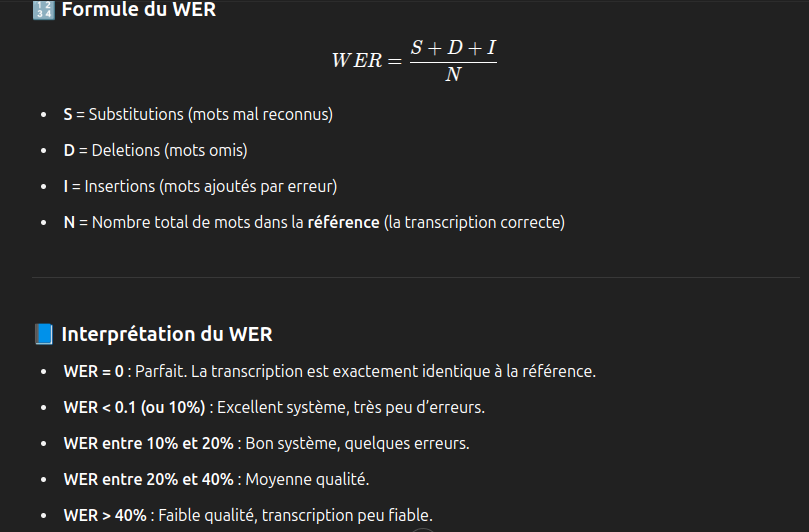

In [ ]:
# Save the DataFrame to a CSV file
df.to_csv('transcription_results2.csv', index=False)